In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./marketdata2.csv').drop(['Unnamed: 0'], axis=1)
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,N,Y,C,B,D,A,F,E,New,G
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,1,0,0,0,0,0,0
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,1,0,0,0,0,0
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,0,0,0,1,0,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,1,0,0,0,0,0,1,0,0,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,1,0,1,0,0,0,0,0,0,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,1,0,1,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df['nAveSpend'] = qt.fit_transform(df[['aveSpend']].values.reshape(-1,1))
df['nIncome'] = qt.fit_transform(df[['income']].values.reshape(-1,1))
df['nAge'] = qt.fit_transform(df[['age']].values.reshape(-1,1))

df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,B,D,A,F,E,New,G,nAveSpend,nIncome,nAge
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,0,1.798751,-0.406079,0.037646
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,1,0,0,0,0,0,0,-0.694311,0.912774,0.123259
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,0,1,0,0,0,0,0,0.559895,-0.406079,0.283522
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,0,-0.362850,1.831224,5.199338
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,0,1,0,0,0,0,-0.687284,-0.106841,0.744694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,1,0,0,1.748868,-1.340200,-0.659602
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,0,1,0,0,0,1.280981,-0.051460,1.269664
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,0,1.694923,-0.758004,-0.985610
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0,0.779682,0.240671,1.169401


In [3]:
df.columns

Index(['age', 'marital', 'segment', 'SocialMedia', 'income', 'creditRating',
       'aveSpend', 'touchpoints', 'nTouchpoints', 'recent_touchpoint',
       'num_creditRating', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge'],
      dtype='object')

Plot for NAGE: total counts = 14989


/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


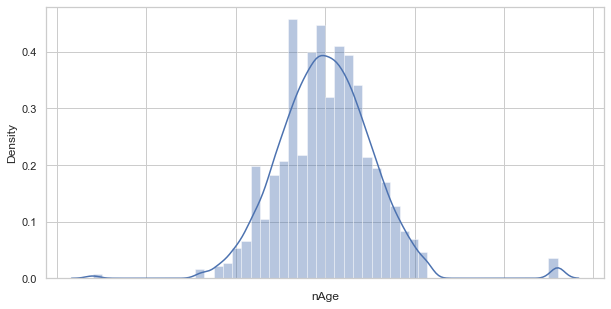

Plot for NINCOME: total counts = 14989


/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


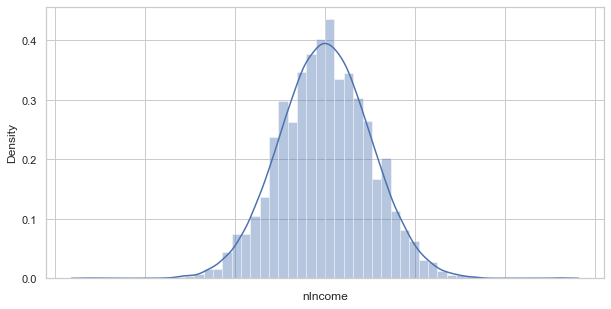

Plot for NAVESPEND: total counts = 14989


/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


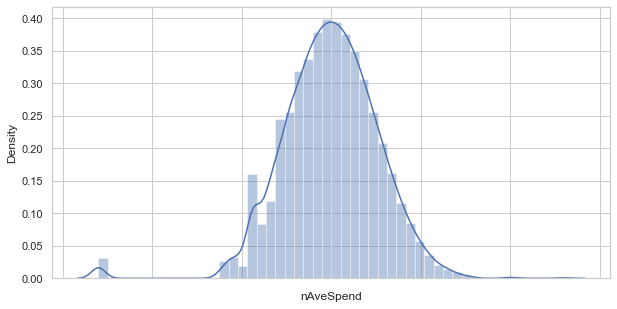

In [4]:
import seaborn as sns
sns.set(style="whitegrid")

df_explore = df[['nAge', 'nIncome', 'nAveSpend']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [5]:
df['recent_touchpoint'].unique()

array(['mailDiscount', 'mailGift', 'emailDiscount', 'emailDestination',
       'smsDiscount', 'smsDestination', 'emailGift', 'smsGift',
       'mailDestination'], dtype=object)

In [6]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = df['recent_touchpoint'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'mailDiscount',
 1: 'mailGift',
 2: 'emailDiscount',
 3: 'emailDestination',
 4: 'smsDiscount',
 5: 'smsDestination',
 6: 'emailGift',
 7: 'smsGift',
 8: 'mailDestination'}

In [7]:
class2idx

{'mailDiscount': 0,
 'mailGift': 1,
 'emailDiscount': 2,
 'emailDestination': 3,
 'smsDiscount': 4,
 'smsDestination': 5,
 'emailGift': 6,
 'smsGift': 7,
 'mailDestination': 8}

In [8]:
df['label'] = df['recent_touchpoint'].replace(class2idx)

In [9]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,D,A,F,E,New,G,nAveSpend,nIncome,nAge,label
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,1.798751,-0.406079,0.037646,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,0,0,0,-0.694311,0.912774,0.123259,1
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,0,0,0.559895,-0.406079,0.283522,2
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,-0.362850,1.831224,5.199338,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,0,-0.687284,-0.106841,0.744694,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,1,0,0,1.748868,-1.340200,-0.659602,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,1,0,0,0,1.280981,-0.051460,1.269664,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,1.694923,-0.758004,-0.985610,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0.779682,0.240671,1.169401,3


In [10]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df, 'label', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df[df.index.isin(val_idxs)], 'label', val_percent=0.5)

In [11]:
train_df = df[df.index.isin(train_idxs)]
X_train = train_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_train = train_df[['label']].values
print('Retrieved Training Data')
val_df = df[df.index.isin(val_idxs)]
X_val = val_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_val = val_df[['label']].values
print('Retrieved Validation Data')
test_df = df[df.index.isin(test_idxs)]
X_test = test_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_test = test_df[['label']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


In [12]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestClassifier(random_state=27, verbose=1)

In [20]:
predicted_labels = clf.predict(training_data['X_test'])
accuracy_score(training_data['Y_test'], predicted_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.78330658105939

In [21]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [23]:
clf = gsearch1.best_estimator_

In [25]:
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
predicted_labels = clf.predict(training_data['X_test'])
train_pred = clf.predict(training_data['X_train'])
print('Train Accuracy:'+str(accuracy_score(training_data['Y_train'], train_pred)))
print('Train F1-Score(Micro):'+str(f1_score(training_data['Y_train'], train_pred,average='micro')))
print('------')
print('Test Accuracy:'+str(accuracy_score(training_data['Y_test'], predicted_labels)))
print('Test F1-Score(Micro):'+str(f1_score(training_data['Y_test'], predicted_labels,average='micro')))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy:0.738728323699422
Train F1-Score(Micro):0.738728323699422
------
Test Accuracy:0.617442482611022
Test F1-Score(Micro):0.617442482611022


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.4s finished


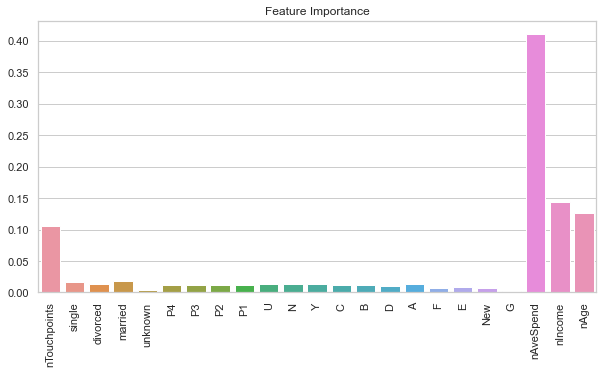

In [27]:
f, ax = plt.subplots(figsize=(10,5))
features = ['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
   'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
   'G', 'nAveSpend', 'nIncome', 'nAge']
plot = sns.barplot(x=features, y=clf.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

#### XGBoost

In [13]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = ['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

Fitting model...
[11:20:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting done!
[0]	val-mlogloss:2.07897	val-merror:0.51147	train-mlogloss:2.07067	train-merror:0.48813
[100]	val-mlogloss:0.97110	val-merror:0.31627	train-mlogloss:0.83830	train-merror:0.22632
[200]	val-mlogloss:0.69214	val-merror:0.17547	train-mlogloss:0.52822	train-merror:0.08813
[299]	val-mlogloss:0.52319	val-merror:0.12000	train-mlogloss:0.35743	train-merror:0.03815
-- Model Report --
XGBoost Accuracy: 0.9689673622257892
XGBoost F1-Score (Micro): 0.9689673622257892


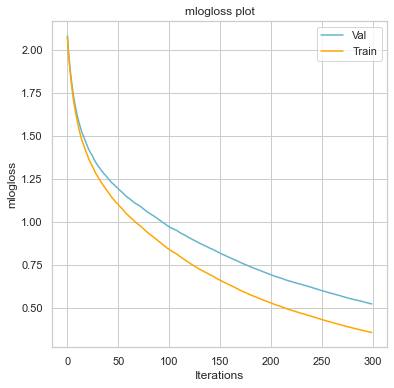

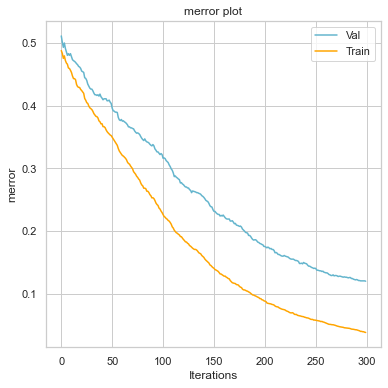

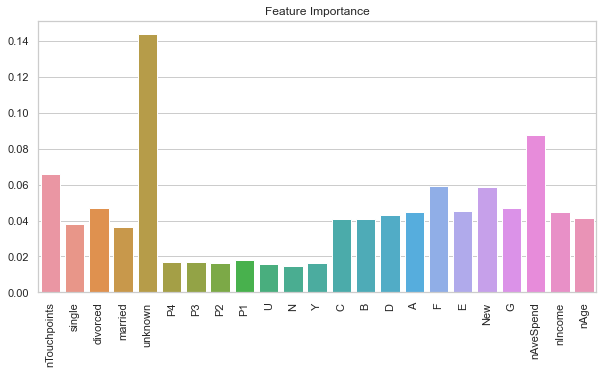

In [16]:
fitXgb(xgb1, training_data)